Exploratory Data Analysis on Avocado Prices and Sales

In [2]:
from IPython.display import HTML
HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    The raw code for this IPython notebook is by default hidden for easier reading.
    To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
! pip install -U arrow

Requirement already up-to-date: arrow in c:\users\brian\anaconda3\lib\site-packages (0.15.2)


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import arrow
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

sns.set(rc={'figure.figsize':(13,9)})

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/briankosiadi/Capstone-1/master/avocado.csv')

In [6]:
# Dropping columns that I will not be using
avocado_df = df.drop(['Unnamed: 0', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis=1)

In [7]:
# Added a column Estimated Gross that outputs product of Average Price and Total Volume
avocado_df.insert(3, 'EstimatedGross', (avocado_df['AveragePrice'] * avocado_df['Total Volume']))

In [8]:
# Creating timestamp from Date which was a string type
avocado_df['timestamps'] = avocado_df['Date'].apply(lambda x: arrow.get(x).naive)

In [9]:
# create function that grouped dates into seasons
def check_season(date):
    if date.month in (12, 1, 2):
        return 'Winter'
    elif date.month in (3, 4, 5):
        return 'Spring'
    elif date.month in (6, 7, 8):
        return 'Summer'
    elif date.month in (9, 10, 11):
        return 'Autumn'

In [10]:
avocado_df['season'] = avocado_df['timestamps'].apply(check_season)

In [11]:
# I noticed that conventional avocados contributed to a vast majority of the two types of avocados, and because of the
# very different and non-normal trends from organic avocados, I decided to separate the two to just use conventional avocados
conventional_avocados = avocado_df.loc[avocado_df['type']=='conventional']
organic_avocados = avocado_df.loc[avocado_df['type']=='organic']

In [12]:
print('Average weekly volume sales of conventional avocados:')
conventional_avocados['Total Volume'].mean()

Average weekly volume sales of conventional avocados:


1653212.898456057

In [13]:
print('Average weekly volume sales of organic avocados:')
organic_avocados['Total Volume'].mean()

Average weekly volume sales of organic avocados:


47811.2114534693

In [14]:
# From regions, I categorized regions into the five main regions
region_filter = ['Midsouth', 'Northeast', 'SouthCentral', 'Southeast', 'West']
avocado_by_region = conventional_avocados[conventional_avocados['region'].isin(region_filter)]

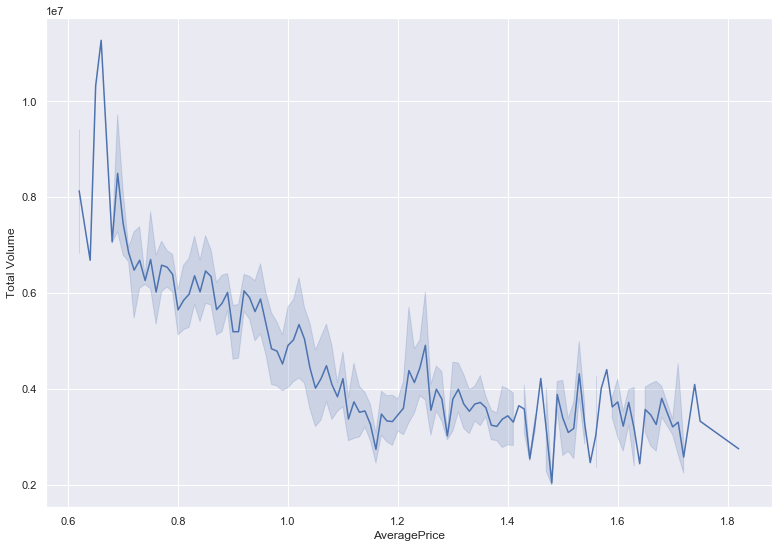

In [28]:
sns.lineplot(x='AveragePrice', y='Total Volume', data=avocado_by_region)

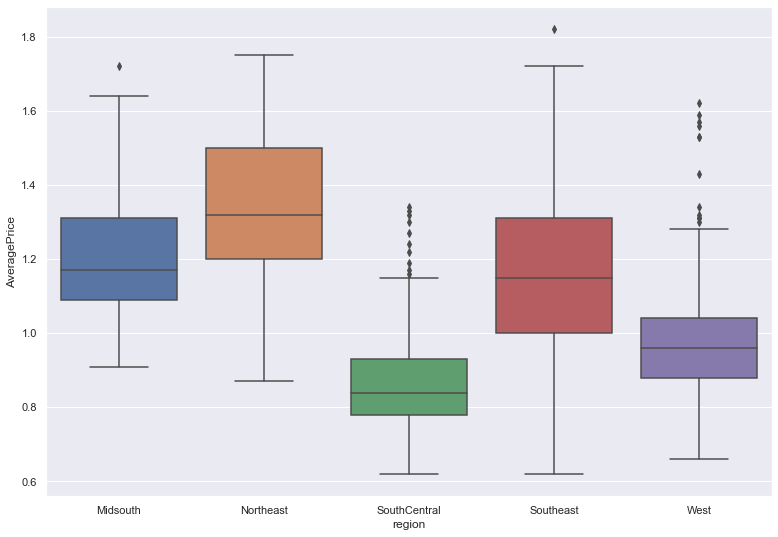

In [29]:
# From the box plot we can observe visually price ranges for each region
sns.boxplot(x='region', y='AveragePrice', data=avocado_by_region)

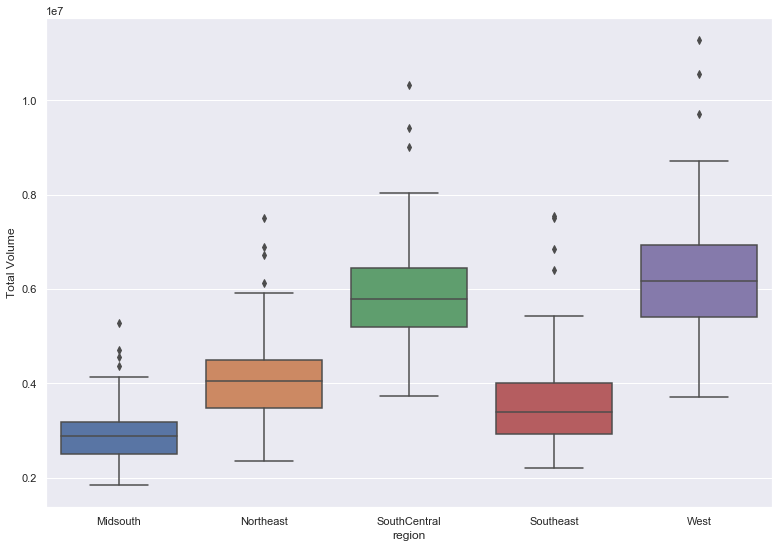

In [31]:
# sales are highest in west and south central regions
sns.boxplot(x='region', y='Total Volume', data=avocado_by_region)

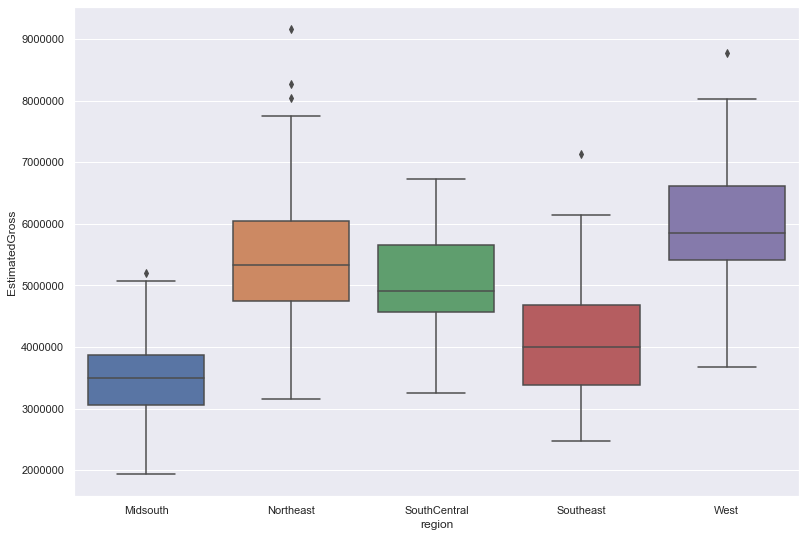

In [32]:
# Boxplot shows that west has highest amount of gross sales, and midsouth with the lowest.
sns.boxplot(x='region', y='EstimatedGross', data=avocado_by_region)

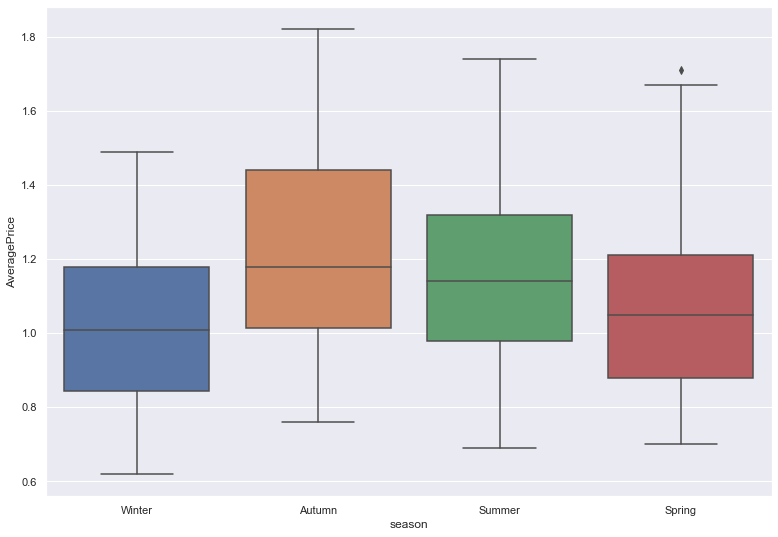

In [33]:
# From the box plot we can observe visually price ranges for each season
sns.boxplot(x='season', y='AveragePrice', data=avocado_by_region)

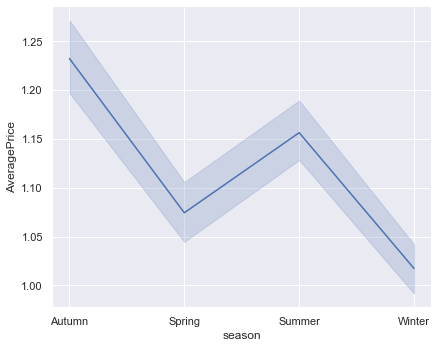

In [34]:
# We can see the correlation between price and season here
sns.relplot(x='season', y='AveragePrice', kind='line', data=avocado_by_region, height=5, aspect=1.25)

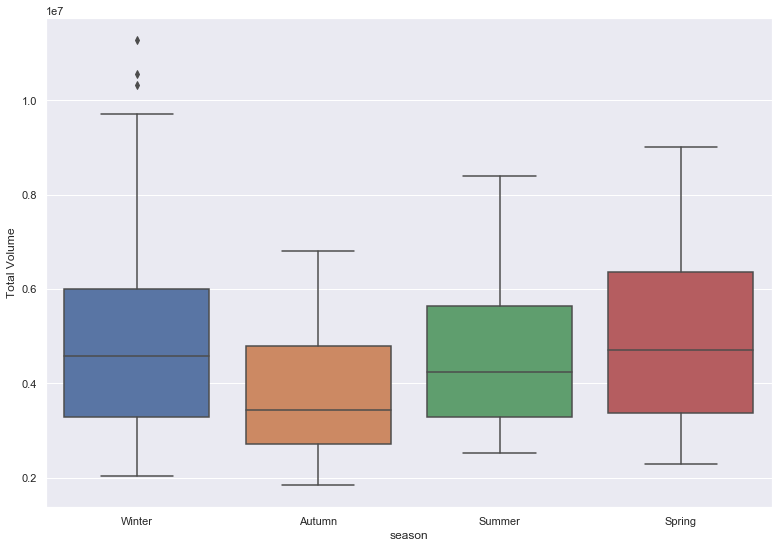

In [35]:
# Boxplot also suggests Autumn has significant difference from the the other seasons in total volume sales
sns.boxplot(x='season', y='Total Volume', data=avocado_by_region)

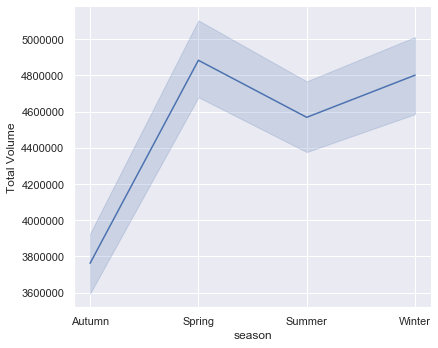

In [36]:
# Relational plot shows total volume sales in Autumn significantly lower than the other seasons.
sns.relplot(x='season', y='Total Volume', kind='line', data=avocado_by_region, height=5, aspect=1.25)

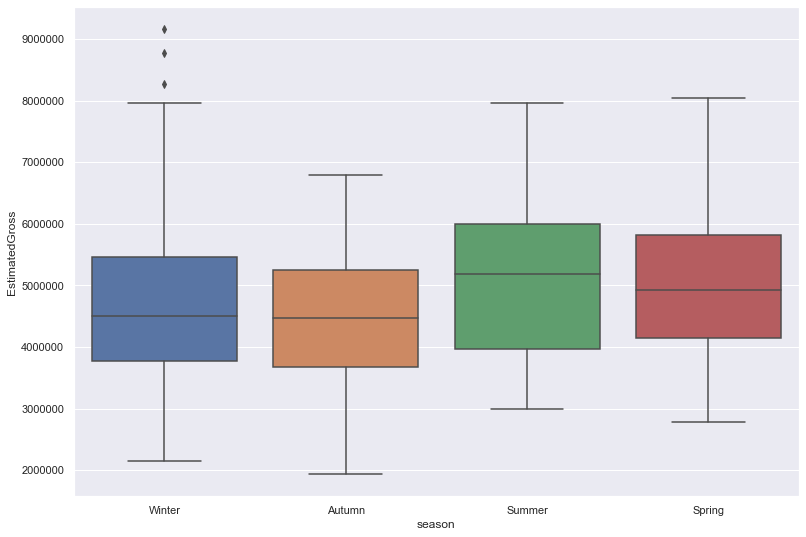

In [37]:
sns.boxplot(x='season', y='EstimatedGross', data=avocado_by_region)

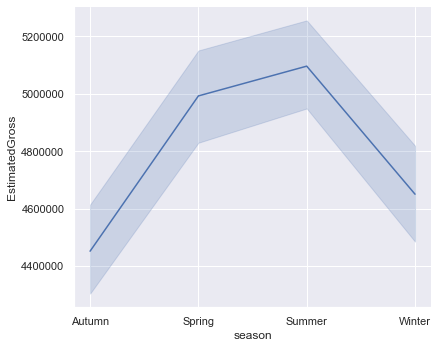

In [38]:
# Though Autumn had highest price and Winter had highest volume sales, Summer and Spring had the highest gross sales.
sns.relplot(x='season', y='EstimatedGross', kind='line', data=avocado_by_region, height=5, aspect=1.25)

Recommendations:
Lowering price of avocados in Autumn
Raising price of avocados in Winter
Raising supply of avocados in West and Northeast regions